## 1. Mount Drive and Read Data

In [1]:
# Mount google drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# os.chdir('/content/drive/MyDrive/BT4221 Project/Processing   Model /Data')
os.chdir("/content/drive/MyDrive/AY21_22/2021/BT4221/BT4221 Project/Processing   Model /Data")

In [3]:
!pwd

/content/drive/MyDrive/AY21_22/2021/BT4221/BT4221 Project/Processing   Model /Data


## 2. Import Libraries

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 3. Load Images

In [5]:
img_size = 224

# train_path = "/content/drive/My Drive/Data/train"
# test_path = "/content/drive/My Drive/Data/test"
train_path = '/content/drive/MyDrive/AY21_22/2021/BT4221/BT4221 Project/Processing   Model /Data/train'
test_path = '/content/drive/MyDrive/AY21_22/2021/BT4221/BT4221 Project/Processing   Model /Data/test'

classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)

img_size = [224, 224]
train_datagen = ImageDataGenerator(rescale = 1./224)

test_datagen = ImageDataGenerator(rescale = 1./224)

train_gen = train_datagen.flow_from_directory(directory = train_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 8,
                                                        shuffle = True,
                                                        class_mode = 'categorical')

test_gen = test_datagen.flow_from_directory(directory = test_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 1,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 6033 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


# 4. Load Various Models and Run Heatmap

## 4.1 Load Model and Run Heatmap - 1 Dropout

In [ ]:
# !git clone https://github.com/gkeechin/vizgradcam
os.chdir("/content/drive/My Drive/Data/vizgradcam") # cd into the vizgradcam folder downloaded from git

In [ ]:
# Load Model
model = load_model('vgg_1dropout.h5')
print('Model loaded!')

Model loaded!


In [ ]:
# y_pred = model.predict(test_gen)
# y_pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)

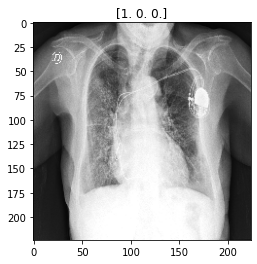

In [ ]:
#an example of how to retrieve an image
test_img = test_gen.__getitem__(1)
preview_imgs, preview_labels = test_img
plt.title(str(preview_labels[0]))
plt.imshow(preview_imgs[0])

img = preview_imgs[0]
img.shape

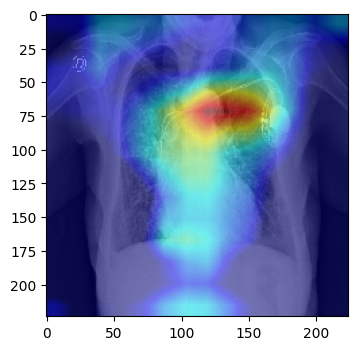

In [ ]:
VizGradCAM(
    model,  
    img
)

/content/drive/.shortcut-targets-by-id/1tBdSji21KgPglmR793LZtaDQOEIckCP4/BT4221 Project/Processing   Model /Data/vizgradcam/gradcam.py:77: RuntimeWarning: invalid value encountered in true_divide
  activation_map.max() - activation_map.min()


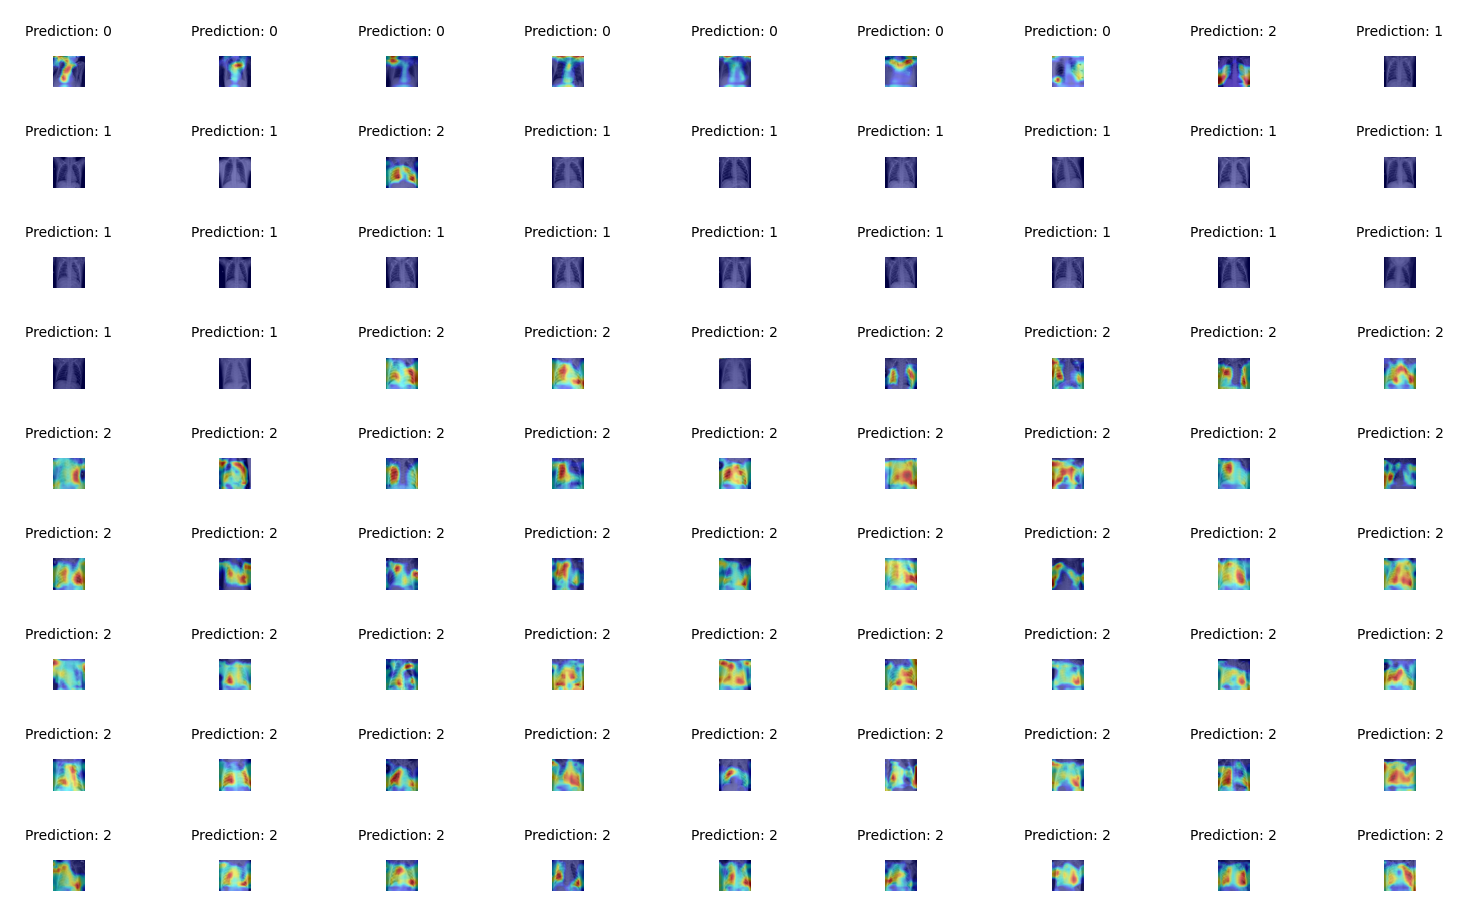

In [ ]:
for i in range(len(test_gen)):
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(9,9, i+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(preview_img[0].reshape(1, 224, 224, 3))
  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])

/content/drive/.shortcut-targets-by-id/1tBdSji21KgPglmR793LZtaDQOEIckCP4/BT4221 Project/Processing   Model /Data/vizgradcam/gradcam.py:77: RuntimeWarning: invalid value encountered in true_divide
  activation_map.max() - activation_map.min()


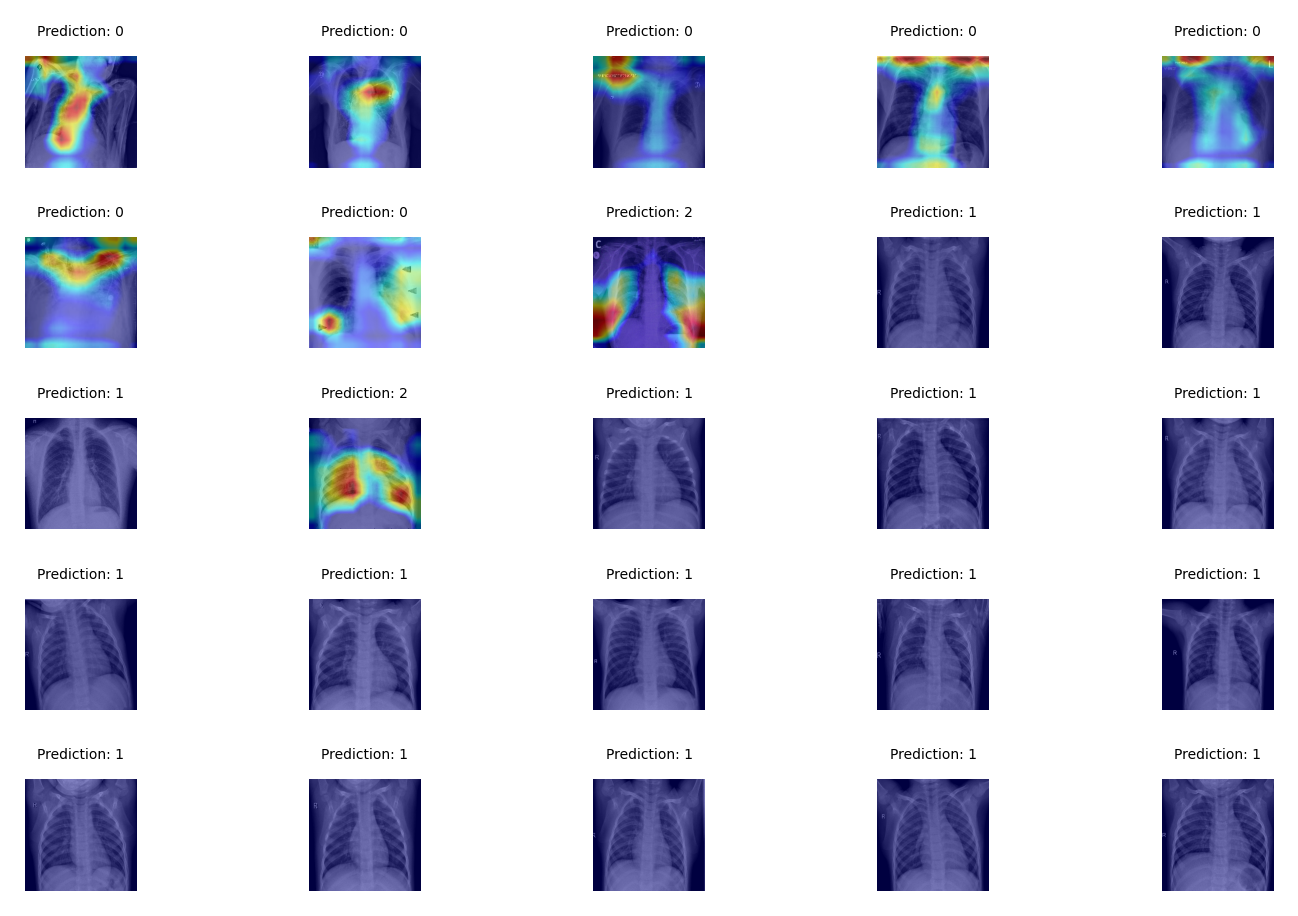

In [ ]:
for i in range(25):
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(5,5, i+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(preview_img[0].reshape(1, 224, 224, 3))
  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])

## 4.2 Load Model and Run Dropout (Combined)

In [ ]:
# Load Model
model = load_model('model_5_1.h5')
print('Model loaded!')

Model loaded!


In [ ]:
os.chdir("/content/drive/MyDrive/AY21_22/2021/BT4221/BT4221 Project/Processing   Model /Data/vizgradcam")

In [ ]:
from gradcam import VizGradCAM

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


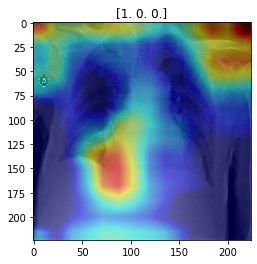

In [ ]:
test_img = test_gen.__getitem__(1)
preview_imgs, preview_labels = test_img
plt.title(str(preview_labels[0]))
plt.imshow(preview_imgs[0])

img = preview_imgs[0]
VizGradCAM(
    model,  
    img
)

### Prediction = 0

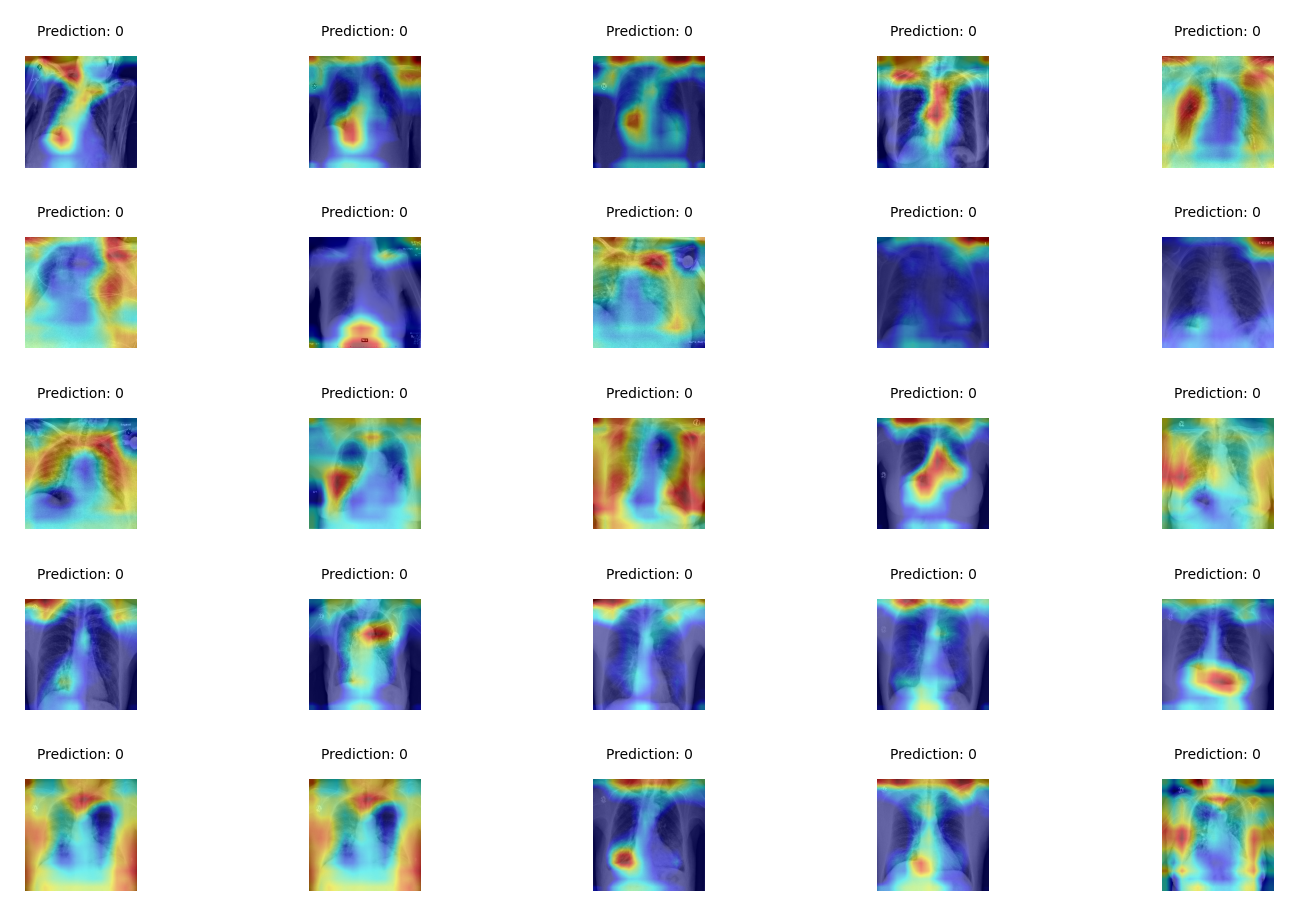

In [ ]:
i = 0
counter = 0
graph = 0
covid = False

while counter < 25:
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(5,5, graph+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(preview_img[0].reshape(1, 224, 224, 3))

  if 'COVID' in test_gen.filenames[i]:
    covid = True
  else:
    covid = False
  
  if str(pred.argmax()) == '0' and covid:
    counter += 1
    i += 1
  else:
    i += 1
    continue

  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])
  graph += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


KeyboardInterrupt: ignored

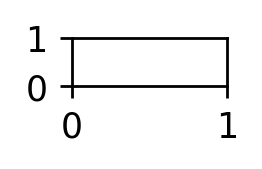

In [ ]:
i = 0
counter = 0
graph = 0
covid = False

while counter < 49:
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(7,7, graph+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(preview_img[0].reshape(1, 224, 224, 3))

  if 'COVID' in test_gen.filenames[i]:
    normal = True
  else:
    covid = False

  if str(pred.argmax()) == '0' and covid:
    counter += 1
    i += 1
  else:
    i += 1
    continue

  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])
  graph += 1

### Prediction = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


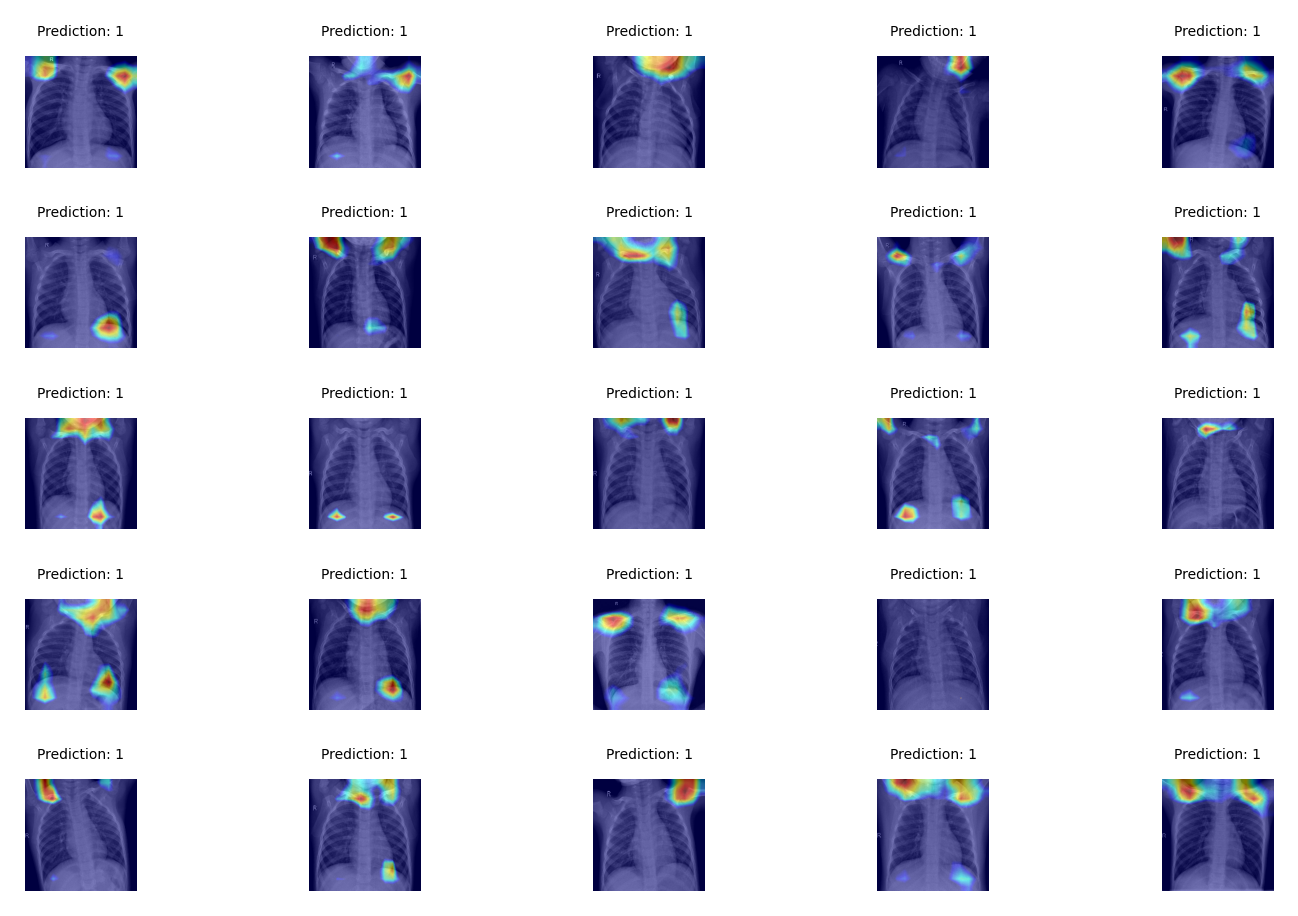

In [ ]:
i = 0
counter = 0
graph = 0
normal = False

while counter < 25:
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(5,5, graph+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(preview_img[0].reshape(1, 224, 224, 3))

  if 'NORMAL' in test_gen.filenames[i]:
    normal = True
  else:
    normal = False

  if str(pred.argmax()) == '1' and normal:
    counter += 1
    i += 1
  else:
    i += 1
    continue

  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])
  graph += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


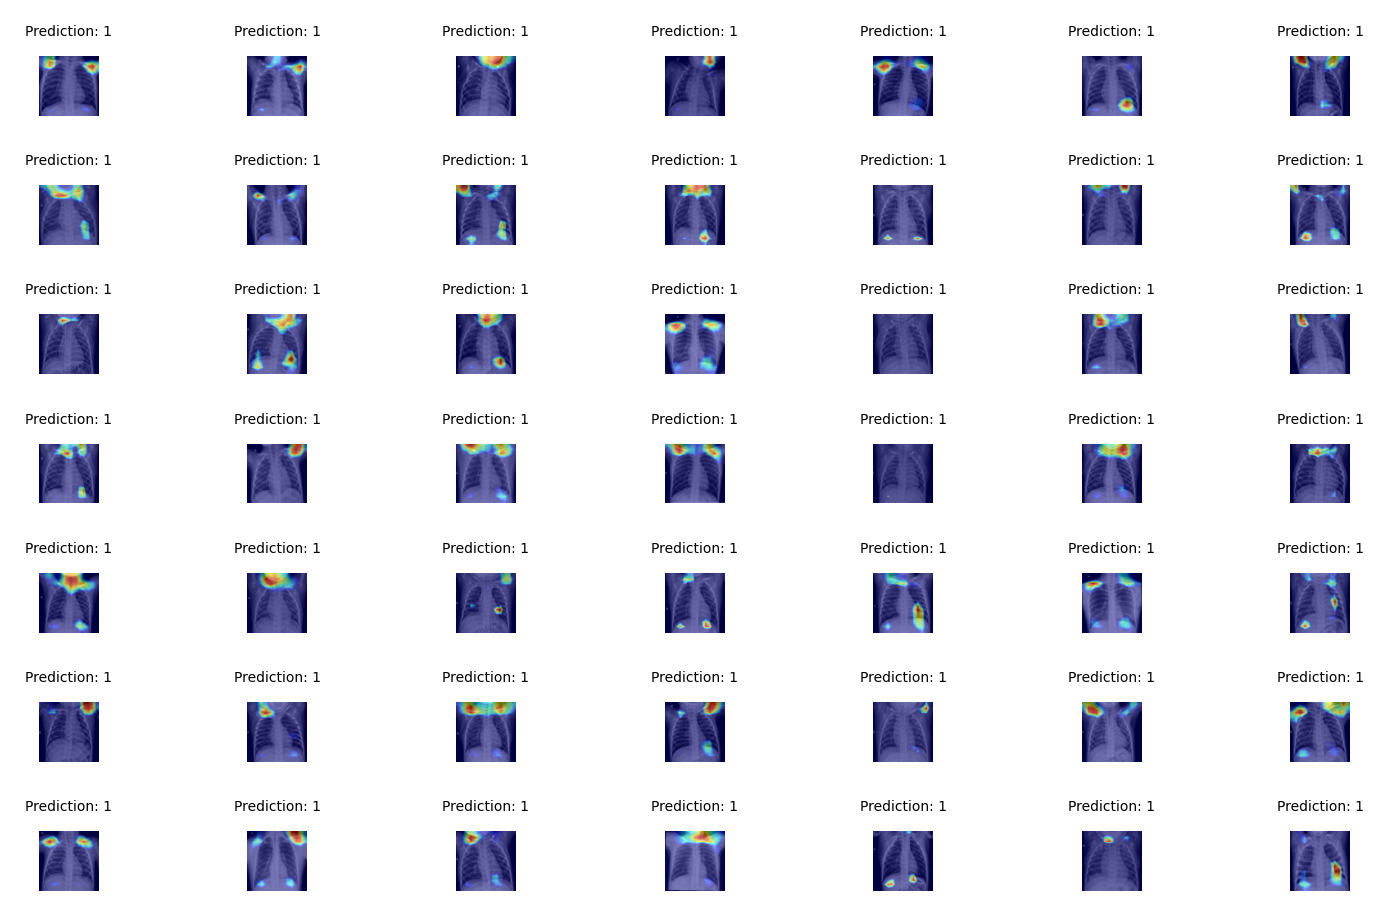

In [ ]:
i = 0
counter = 0
graph = 0
normal = False

while counter < 49:
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(7,7, graph+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(preview_img[0].reshape(1, 224, 224, 3))

  if 'NORMAL' in test_gen.filenames[i]:
    normal = True
  else:
    normal = False

  if str(pred.argmax()) == '1' and normal:
    counter += 1
    i += 1
  else:
    i += 1
    continue

  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])
  graph += 1

### Prediction = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


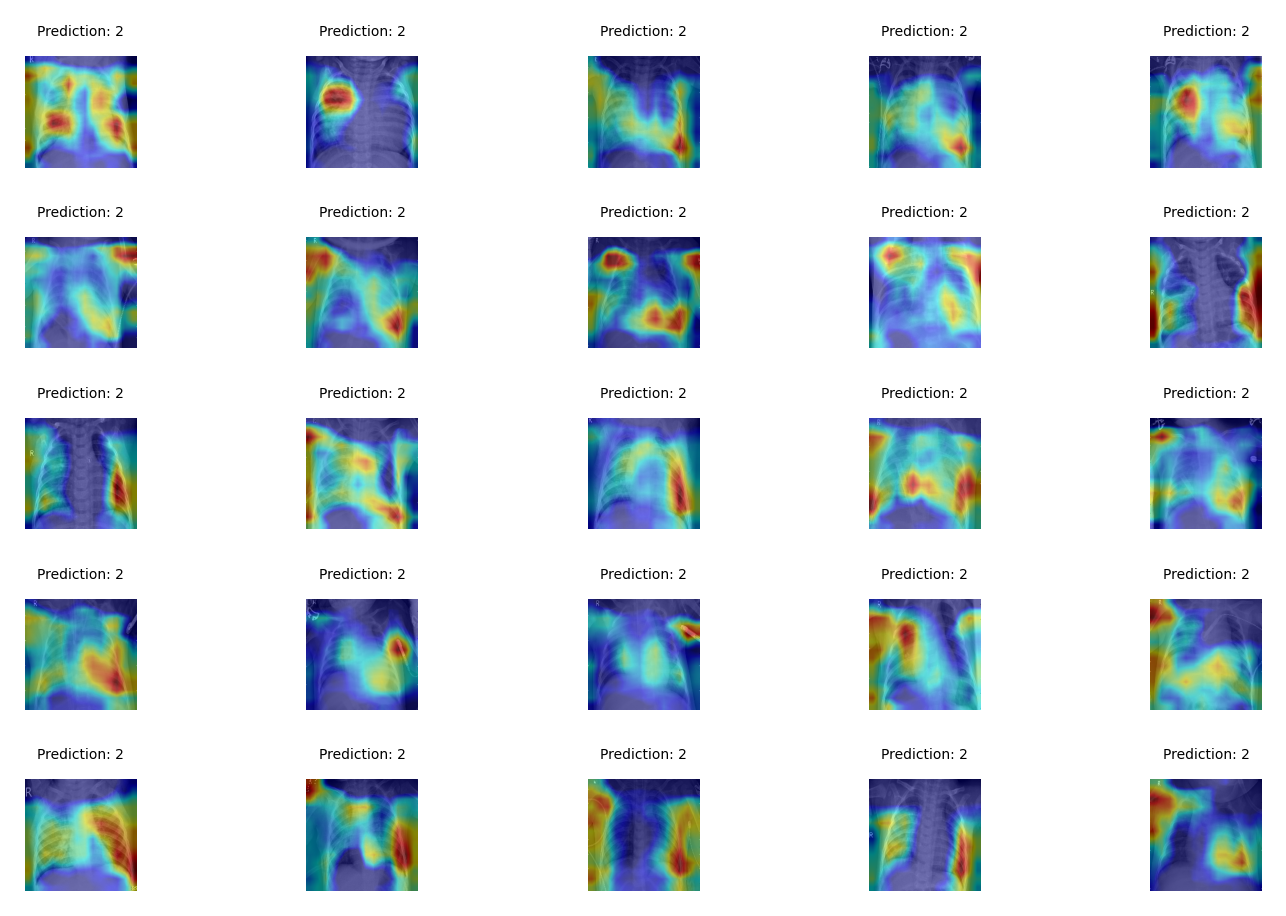

In [ ]:
i = 0
counter = 0
graph = 0
pneumonia = False

while counter < 25:
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(5,5, graph+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(preview_img[0].reshape(1, 224, 224, 3))

  if 'PNEUMONIA' in test_gen.filenames[i]:
    pneumonia = True
  else:
    pneumonia = False

  if str(pred.argmax()) == '2'and pneumonia:
    counter += 1
    i += 1
  else:
    i += 1
    continue

  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])
  graph += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


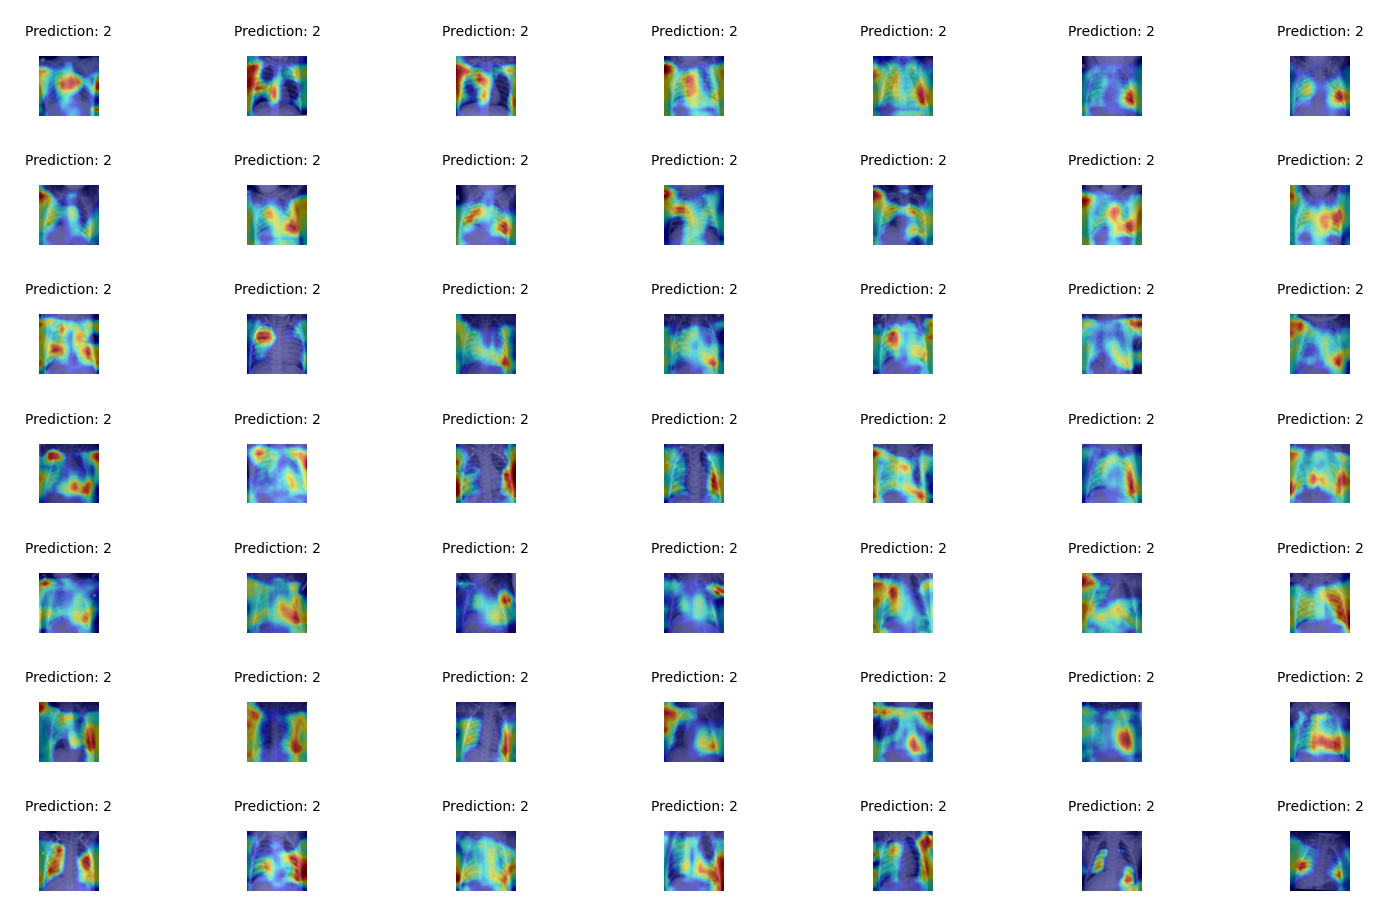

In [ ]:
i = 0
counter = 0
graph = 0
pneumonia = False

while counter < 49:
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(7,7, graph+1)
  plt.tight_layout()
  img = test_gen.__getitem__(i)
  preview_img, preview_labels = img
  pred = model.predict(prev iew_img[0].reshape(1, 224, 224, 3))

  if 'PNEUMONIA' in test_gen.filenames[i]:
    normal = True
  else:
    normal = False

  if str(pred.argmax()) == '2' and pneumonia:
    counter += 1
    i += 1
  else:
    i += 1
    continue

  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, preview_img[0])
  graph += 1

# 5. EDA

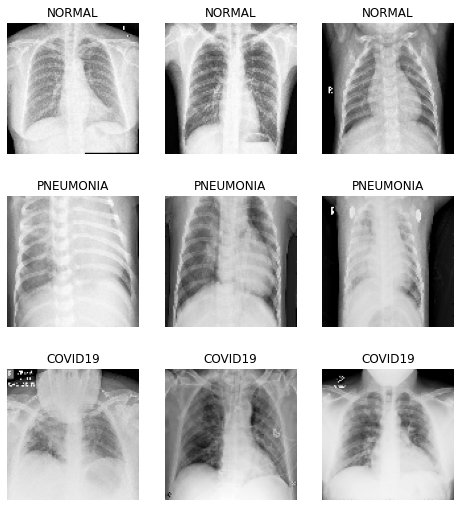

(1266, 3418, 1349)

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


# get the list of jpegs from sub image class folders
normal_imgs = [fn for fn in os.listdir(f'{train_path}/NORMAL') if fn.endswith('.jpg')]
pneumo_imgs = [fn for fn in os.listdir(f'{train_path}/PNEUMONIA') if fn.endswith('.jpg')]
covid_imgs = [fn for fn in os.listdir(f'{train_path}/COVID19') if fn.endswith('.jpg')]
# randomly select 3 of each
select_norm = np.random.choice(normal_imgs, 3, replace = False)
select_pneu = np.random.choice(pneumo_imgs, 3, replace = False)
select_covid = np.random.choice(covid_imgs, 3, replace = False)
# plotting 3 x 3 image matrix
fig = plt.figure(figsize = (8,9))
for i in range(9):
    if i < 3:
        fp = f'{train_path}/NORMAL/{select_norm[i]}'
        label = 'NORMAL'
    elif 3 <= i < 6:
        fp = f'{train_path}/PNEUMONIA/{select_pneu[i-3]}'
        label = 'PNEUMONIA'
    else:
      fp = f'{train_path}/COVID19/{select_covid[i-6]}'
      label = 'COVID19'
    
    ax = fig.add_subplot(3, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
len(normal_imgs), len(pneumo_imgs), len(covid_imgs)

In [9]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(f'{train_path}/NORMAL/', normal_imgs)
pnemonia_images = img2np(f'{train_path}/PNEUMONIA/', pneumo_imgs)
covid_images = img2np(f'{train_path}/COVID19/', covid_imgs)

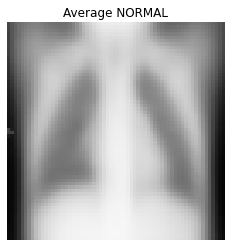

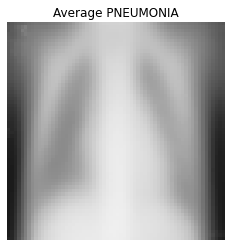

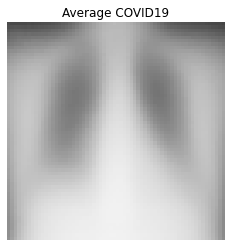

In [ ]:
import numpy as np
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=224, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')
covid_mean = find_mean_img(covid_images, 'COVID19')


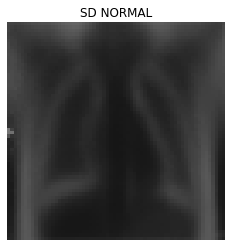

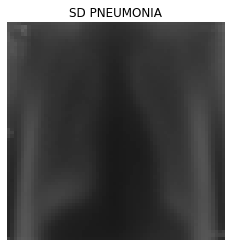

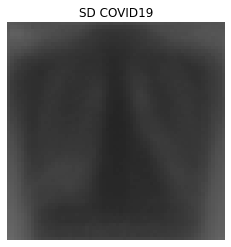

In [10]:
def find_sd_img(full_mat, title, size = (64, 64)):
    # calculate the average
    sd_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    sd_img = sd_img.reshape(size)
    plt.imshow(sd_img, vmin=0, vmax=224, cmap='Greys_r')
    plt.title(f'SD {title}')
    plt.axis('off')
    plt.show()
    return sd_img

norm_sd = find_sd_img(normal_images, 'NORMAL')
pneu_sd = find_sd_img(pnemonia_images, 'PNEUMONIA')
covid_sd = find_sd_img(covid_images, 'COVID19')


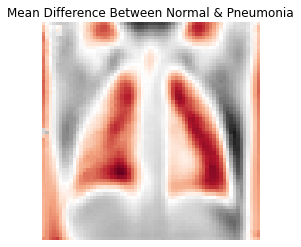

In [ ]:
contrast_mean = norm_mean - pneu_mean
plt.imshow(contrast_mean, cmap='RdGy')
plt.title(f'Mean Difference Between Normal & Pneumonia')
plt.axis('off')
plt.show()

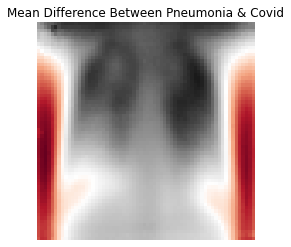

In [ ]:
contrast_mean = pneu_mean - covid_mean
plt.imshow(contrast_mean, cmap='RdGy')
plt.title(f'Mean Difference Between Pneumonia & Covid')
plt.axis('off')
plt.show()

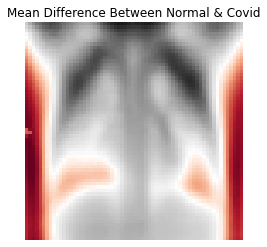

In [ ]:
contrast_mean = norm_mean - covid_mean
plt.imshow(contrast_mean, cmap='RdGy')
plt.title(f'Mean Difference Between Normal & Covid')
plt.axis('off')
plt.show()

Number of PC:  29


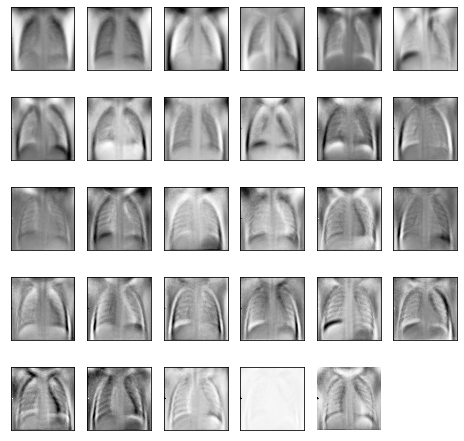

Number of PC:  14


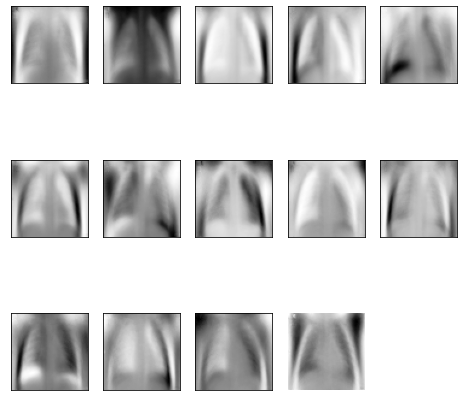

Number of PC:  10


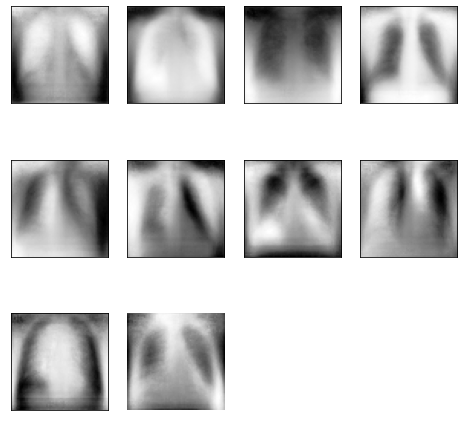

In [ ]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(normal_images, 'NORMAL'))
plot_pca(eigenimages(pnemonia_images, 'PNEUMONIA'))
plot_pca(eigenimages(covid_images, 'COVID19'))